### Project Overview

This project demonstrates the application of Multiple Linear Regression using a dataset (*****) in Python. The steps include data loading, preprocessing, exploratory data analysis (EDA), model training, and evaluation.

In [ ]:
# TESTING 
# Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [3]:
# Import the datafile tw_tweets_users_media_places.csv that was 
# provided with this checkpoint. Set tweet_id as the index. Print the number 
# of records in this dataset in the output. 


import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime



# Load dataset
df = pd.read_csv("C:\\Datasets\\Kwasi\\tw_tweets_users_media_places-Kwasi_Boateng.csv", index_col="tweet_id")
print(f"Number of records: {df.shape[0]}")
df.head()



Number of records: 534


,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,...,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,...,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,...,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [4]:
# Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output. Print
# the first five records of this reduced dataset.



# Select numeric data
df_numeric = df.select_dtypes(include=[np.number]).copy()
print(f"Remaining columns: {list(df_numeric.columns)}")
df_numeric.head()



Remaining columns: ['context_annotations_count', 'count_annotations', 'count_cashtags', 'count_hashtags', 'count_mentions', 'count_urls', 'likes', 'quotes', 'referenced_tweet_count', 'replies', 'retweets', 'followers_count', 'following_count', 'tweet_count', 'listed_count', 'height', 'width']


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width
tweet_id,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048


In [5]:
# Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model. Print out the model results summary.


# Prepare data
X1 = df_numeric.drop(columns=["retweets", "likes", "quotes", "replies"])
y1 = df_numeric["retweets"]
X1 = sm.add_constant(X1)

# Fit model
model1 = sm.OLS(y1, X1).fit()
print(model1.summary())




                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.81e-05
Time:                        11:31:19   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [6]:
# Add the scored (i.e. predicted) values for every record 
# back into the original dataframe using the column label "model_1". Print
# the first five records.



# Add predictions to original DataFrame
df["model_1"] = model1.predict(X1)
df[["model_1"]].head()



,model_1
tweet_id,
1440484799970304000,6.395809
1439618825171963904,2.022634
1248872872837332992,5.030170
1250729294051053568,1.159034
1249612131433095168,1.159034


In [7]:
# Calculate and/or print the following five metrics for the 
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE, 
# MAE, and mean of the label column. 


from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y1, df["model_1"]))
mae = mean_absolute_error(y1, df["model_1"])
mean_label = y1.mean()

print(f"R2: {model1.rsquared}")
print(f"Adjusted R2: {model1.rsquared_adj}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Label Mean: {mean_label}")




R2: 0.07614441144416229
Adjusted R2: 0.05486558790736762
RMSE: 18.934566285584516
MAE: 5.159386575412409
Label Mean: 3.900749063670412


In [29]:
# Improve the model fit so that our predictions will
# be more accurate. We begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and 
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. We do not put these values into new 
# columns. Replace the existing dates with those values. 

# HINT: First, cast those columns to dt.date data types. Second, there are
# many ways to calculate the number of days until January 1, 2022. But I 
# used the strptime() method of the datetime package to cast "2022-1-1" 
# into a date, subtract the column value from that date, and then return 
# the result in days (.dt.days). 

# Print the first five records of this new dataset.



from datetime import datetime
import pandas as pd
import pytz  # If not already imported

# Create timezone-aware reference date
ref_date = pd.Timestamp("2022-01-01", tz="UTC")

# Convert and subtract to get days difference
df["created_at_tweet"] = (ref_date - pd.to_datetime(df["created_at_tweet"], utc=True)).dt.days
df["created_at_author"] = (ref_date - pd.to_datetime(df["created_at_author"], utc=True)).dt.days

# Preview the result
df[["created_at_tweet", "created_at_author"]].head()




,created_at_tweet,created_at_author
tweet_id,,
1440484799970304000,100,3352
1439618825171963904,103,2873
1248872872837332992,629,3651
1250729294051053568,624,3651
1249612131433095168,627,3651


In [30]:
# Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'. 

# Print out the results summary.

# HINT: Do not forget that if you are using the same DataFrame that contained
# the 'model_1' predicted values column, you will need to drop that column as 
# well. Otherwise, you are creating a new model to predict retweet count using
# a predicted value of retweet count from a prior model run which doesn't make
# any sense. However, you may have created a copy of the DataFrame in some 
# prior task so that 'model_1' is not even in the DataFrame you are using now. 
# In that case, this HINT is irrelevant.



df2 = df.select_dtypes(include=[np.number]).drop(columns=["likes", "quotes", "replies", "model_1"])
X2 = df2.drop(columns="retweets")
y2 = df2["retweets"]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())



                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     20.29
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           4.87e-43
Time:                        11:48:41   Log-Likelihood:                -2226.0
No. Observations:                 534   AIC:                             4484.
Df Residuals:                     518   BIC:                             4552.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [32]:
# Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model. 


rmse2 = np.sqrt(mean_squared_error(y2, model2.predict(X2)))
mae2 = mean_absolute_error(y2, model2.predict(X2))
mean_label2 = y2.mean()

print(f"R-squared: {model2.rsquared}")
print(f"R-squared-adjusted: {model2.rsquared_adj}")
print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")
print(f"Label Mean: {mean_label2}")


R-squared: 0.3700526564669486
R-squared-adjusted: 0.35181093802487184
RMSE: 15.635272002164399
MAE: 6.490392606438637
Label Mean: 3.900749063670412


In [33]:
# We want to improve model fit even further by generating 
# dummy codes for some of the categorical features that do not have too many 
# group values like 'text' and 'url' do. In particular, generate dummy 
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining 
# non-numeric features as well as the alternative labels 'likes', 'quotes', 
# and 'replies'. As in #7, make sure you are not including the 'model_1' 
# column of predicted values. Do not train the model again yet. You are 
# just creating the dummy codes in this step.

# Print out the first five records after the dummy codes are created.



df3 = df.copy()
df3 = pd.get_dummies(df3, columns=["lang", "reply_settings", "source", "protected", "verified", "terms"], drop_first=True)
df3 = df3.select_dtypes(include=[np.number]).drop(columns=["likes", "quotes", "replies", "model_1"])
df3.head()




,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,retweets,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,retweets_log1p,retweets_log
tweet_id,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,100,0,0,3352,2709,4999,96,15,405,813,0.000000,0.000000
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,103,0,0,2873,140,735,99,0,2048,1536,0.000000,0.000000
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,629,0,20,3651,7510,7260,100,103,288,278,3.044522,3.044522
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,624,0,1,3651,7510,7260,100,103,2048,2048,0.693147,0.693147
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,627,0,21,3651,7510,7260,100,103,2048,2048,3.091042,3.091042


In [12]:
# Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we 
# created previously. Print out the results summary.



X3 = df3.drop(columns="retweets")
y3 = df3["retweets"]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()
print(model3.summary())



                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.81e-05
Time:                        11:34:16   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [13]:
# Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the 
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.



vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns
vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif_data = vif_data[vif_data["feature"] != "const"].sort_values(by="VIF", ascending=False)
vif_data



C:\Users\Nana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
11,listed_count,19.022305
8,followers_count,17.999431
12,height,2.028669
13,width,1.995588
4,count_hashtags,1.792664
1,context_annotations_count,1.689247
9,following_count,1.243008
2,count_annotations,1.070226
6,count_urls,1.056441
10,tweet_count,1.052539


In [14]:
# We need to eliminate those features with excessive multi-collinearity. 
# However, this may happen naturally as we remove those features with large p-values. 
# Therefore, start by removing the feature with the highest p-value and then rerun 
# the prior model. One-at-a-time, continue removing the feature with the highest p-value 
# (rerunning the model each time) until the difference between R-squared and R-squared
# adjusted is <= 0.01 (rounded). 

# Why would we do this? Because when R-squared adjusted is significantly lower than 
# R-squared, we have too many variables in the model that are not significantly 
# contributing to model fit. Once more, remove the highest p-value feature one-at-a-time
# until R-squared minus R-squared adjusted is <= 0.01 (rounded). You do NOT need to keep
# the results summary of every model. You can overwrite the prior model summary each time
# until you meet the criterion.



X_iter = X3.copy()
while True:
    model_iter = sm.OLS(y3, X_iter).fit()
    if (model_iter.rsquared - model_iter.rsquared_adj) <= 0.01:
        break
    pvals = model_iter.pvalues.drop("const")
    if pvals.max() < 0.05:
        break
    X_iter = X_iter.drop(columns=[pvals.idxmax()])

final_model = model_iter
X_final = X_iter
print(final_model.summary())



                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.683
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           5.49e-07
Time:                        11:34:57   Log-Likelihood:                -2330.6
No. Observations:                 534   AIC:                             4673.
Df Residuals:                     528   BIC:                             4699.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5418      3.34

In [15]:
# For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.



vif_final = pd.DataFrame()
vif_final["feature"] = X_final.columns
vif_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif_final = vif_final[vif_final["feature"] != "const"].sort_values(by="VIF", ascending=False)
vif_final




C:\Users\Nana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
5,height,1.984465
6,width,1.974153
3,count_urls,1.035903
4,followers_count,1.014330
1,count_annotations,1.010309
2,count_mentions,NaN


In [16]:
# Now we have a nice and trim model. However, we cannot 
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.



scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X_final.drop(columns="const")), columns=X_final.columns.drop("const"))
y_norm = pd.DataFrame(scaler.fit_transform(y3.values.reshape(-1, 1)), columns=["retweets"])
df_norm = pd.concat([X_norm, y_norm], axis=1)
df_norm.head()



,count_annotations,count_mentions,count_urls,followers_count,height,width,retweets
0,0.0,0.0,0.0,0.004192,0.147887,0.343468,0.000000
1,0.5,0.0,0.0,0.000217,0.919249,0.686936,0.000000
2,0.0,0.0,0.0,0.011620,0.092958,0.089311,0.060606
3,0.5,0.0,0.5,0.011620,0.919249,0.930166,0.003030
4,0.5,0.0,0.5,0.011620,0.919249,0.930166,0.063636


In [17]:
# Rerun our last model using the normalized values. Print
# the results summary.



X_norm_const = sm.add_constant(X_norm)
model_norm = sm.OLS(y_norm, X_norm_const).fit()
model_norm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               retweets   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.683
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           5.49e-07
Time:                        11:35:53   Log-Likelihood:                 766.12
No. Observations:                 534   AIC:                            -1520.
Df Residuals:                     528   BIC:                            -1495.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0089      0.006      1.449      0.148      -0.003       0.021
count_annotations    -0.0101      0.011     -0.947      0.344      -0.031       0.011
count_mentions     4.522e-16   1.17e-16      3.857      0.000    2.22e-16    6.83e-16
count_urls           -0.0164      0.013     -1.263      0.207      -0.042       0.009
followers_count       0.1657      0.028      5.866      0.000       0.110       0.221
height               -0.0191      0.013     -1.516      0.130      -0.044       0.006
width                 0.0264      0.014      1.833      0.067      -0.002       0.055
==============================================================================
Omnibus:                     1029.328   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           928165.072
Skew:                          13.213   Prob(JB):                         0.00
Kurtosis:                     205.526   Cond. No.                     2.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Skewness of 'retweets': 13.297247408656315


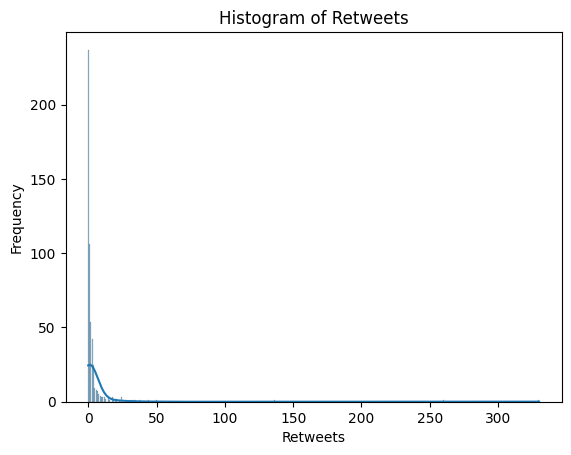

In [23]:
# Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.



import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Calculate skewness of the 'retweets' column
retweet_skewness = df['retweets'].skew()
print("Skewness of 'retweets':", retweet_skewness)

# Plot histogram
sns.histplot(df['retweets'], kde=True)
plt.title('Histogram of Retweets')
plt.xlabel('Retweets')
plt.ylabel('Frequency')
plt.show()





Skewness of 'retweets_log': 1.572517196447617


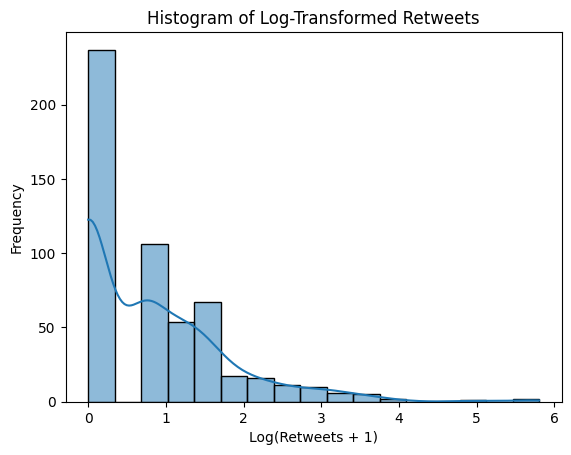

In [24]:
# The skewness of retweets is clearly very extreme. However, we cannot 
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log. 
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets' 
# label to a natural log +1. Print out the new skewness and histogram.



# Apply natural log transformation (+1) to retweets
df['retweets_log'] = np.log1p(df['retweets'])

# Calculate new skewness
retweet_log_skewness = df['retweets_log'].skew()
print("Skewness of 'retweets_log':", retweet_log_skewness)

# Plot histogram of transformed retweets
sns.histplot(df['retweets_log'], kde=True)
plt.title('Histogram of Log-Transformed Retweets')
plt.xlabel('Log(Retweets + 1)')
plt.ylabel('Frequency')
plt.show()



In [27]:
# Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.


# Prepare features and label for MLR model (drop target columns)
X = df.drop(columns=['retweets', 'retweets_log'])

# Select only numeric columns (to avoid dtype=object error)
X = X.select_dtypes(include=[np.number])

# Add constant term for intercept
X = sm.add_constant(X)

# Label
y = df['retweets_log']

# Fit MLR model
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           retweets_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.372e+25
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:46:23   Log-Likelihood:                 13949.
No. Observations:                 534   AIC:                        -2.786e+04
Df Residuals:                     517   BIC:                        -2.779e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 